In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def plot_mcmc_diagnostic(data1, data2, data3, filename):

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_axes([0,0,0.45,0.2])

    minimum = 1.99
    maximum = 2.04

    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax2 = fig.add_axes([0,1/3.,0.45,0.2])
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax3 = fig.add_axes([0.0,2/3.,0.45,0.2])
    ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax1.plot(data1, linewidth=2, color = colors(0))
    ax1.set_xlabel("Iteration", labelpad=10)
    ax1.set_ylabel("Energy (a.u)", labelpad=10)
    ax1.set_title("Trace-plot. MC step-length = 0.05", pad=10)
    ax1.set_ylim((minimum, maximum))

    ax2.plot(data2, linewidth=2, color = colors(1))
    ax2.set_ylabel("Energy (a.u)", labelpad=10)
    ax2.set_xlabel("Iteration", labelpad=10)
    ax2.set_title("Trace-plot. MC step-length = 0.5", pad=10)
    ax2.set_ylim((minimum, maximum))


    ax3.plot(data3, linewidth=2, color = colors(2))
    ax3.set_xlabel("Iteration", labelpad=10)
    ax3.set_ylabel("Energy (a.u)", labelpad=10)
    ax3.set_title("Trace-plot. MC step-length = 5.0", pad=10)
    # ax3.set_ylim((minimum, maximum))


    ax4 = fig.add_axes([0.55,0,0.15,0.2])
    ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax5 = fig.add_axes([0.55,1/3.,0.15,0.2])
    ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax6 = fig.add_axes([0.55,2/3.,0.15,0.2])
    ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax4.hist(data1, linewidth=2, color = colors(0), bins=100)
    ax4.set_xlabel("Energy (a.u)", labelpad=10)
    ax4.set_ylabel("Frequency", labelpad=10)
    ax4.set_title("Histogram. MC step-length = 0.05", pad=10)
    ax4.set_xlim((minimum, maximum))


    ax5.hist(data2, linewidth=2, color = colors(1), bins=100)
    ax5.set_xlabel("Energy (a.u)", labelpad=10)
    ax5.set_ylabel("Frequency", labelpad=10)
    ax5.set_title("Histogram. MC step-length = 0.5", pad=10)
    ax5.set_xlim((minimum, maximum))


    ax6.hist(data3, linewidth=2, color = colors(2), bins=100)
    ax6.set_xlabel("Energy (a.u)", labelpad=10)
    ax6.set_ylabel("Frequency", labelpad=10)
    ax6.set_title("Histogram. MC step-length = 5.0", pad=10)
    # ax6.set_xlim(minimum, maximum)

    ax7 = fig.add_axes([0.8,0,0.15,0.2])
    ax7.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax7.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax8= fig.add_axes([0.8,1/3.,0.15,0.2])
    ax8.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax8.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax9 = fig.add_axes([0.8,2/3.,0.15,0.2])
    ax9.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax9.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    pd.plotting.lag_plot(pd.DataFrame(data1), lag=1, ax = ax7, c=colors(0))
    ax7.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    # ax7.hist(data, linewidth=2, color = colors(0))
    # ax7.set_xlabel("Energy (a.u)", labelpad=10)
    # ax7.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data2), lag=1, ax = ax8, c=colors(1))
    ax8.set_title("Correlation plot. MC step-length = 0.5", pad=10)

    # ax8.hist(data, linewidth=2, color = colors(1))
    # ax8.set_xlabel("Energy (a.u)", labelpad=10)
    # ax8.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data3), lag=1, ax = ax9, c=colors(2))
    ax9.set_title("Correlation plot. MC step-length = 5.0", pad=10)

    # ax9.hist(data, linewidth=2, color = colors(2))
    # ax9.set_xlabel("Energy (a.u)", labelpad=10)
    # ax9.set_ylabel("Frequency", labelpad=10)

    plt.savefig(filename, bbox_inches='tight')

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [7]:
data1 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_rbm_sysInfo_is_stepLength_0.5_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_rbm_numhidden_4_.txt")
data2 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_rbm_sysInfo_is_stepLength_0.05_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_rbm_numhidden_4_.txt")
data3 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_rbm_sysInfo_is_stepLength_0.005_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_rbm_numhidden_4_.txt")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


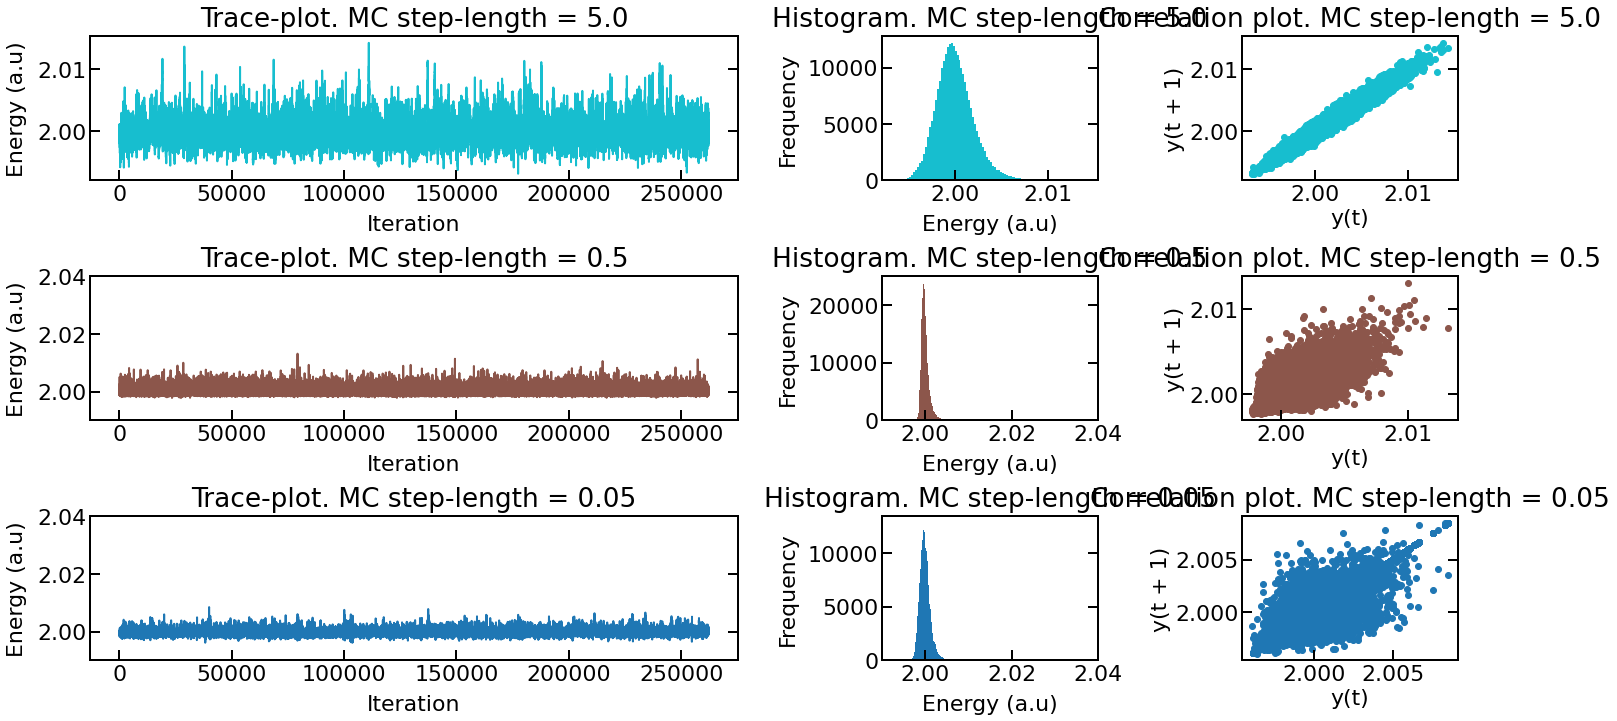

In [8]:
plot_mcmc_diagnostic(data1, data2, data3, "test.png")

In [9]:
block1 = block(data1)
block2 = block(data2)
block3 = block(data3)

energies = [block1[0], block2[0], block3[0]]
variances = [block1[1], block2[1], block3[1]]
acceptances = [acceptance_ratio(data1), acceptance_ratio(data2), acceptance_ratio(data3)]

df = pd.DataFrame({"MC step-length": [0.05, 0.5, 5.0],"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))
# print(block(data1), acceptance_ratio(data1))
# print(block(data2), acceptance_ratio(data2))
# print(block(data3), acceptance_ratio(data3))

0.16050338745117188
0.92120361328125
0.9974708557128906
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &           Var &  Acceptance ratio \\
\midrule
           0.05 &  1.999943 &  4.828554e-10 &          0.160503 \\
           0.50 &  2.000003 &  2.974613e-11 &          0.921204 \\
           5.00 &  1.999997 &  1.839483e-09 &          0.997471 \\
\bottomrule
\end{tabular}

